In [1]:
from google.colab import files 
uploaded = files.upload() 

Saving data.csv to data.csv


In [2]:
import io 
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['data.csv'])) 
print(type(data))
print(data.head)

<class 'pandas.core.frame.DataFrame'>
<bound method NDFrame.head of                                                    URLs  ... Label
0     http://www.bbc.com/news/world-us-canada-414191...  ...     1
1     https://www.reuters.com/article/us-filmfestiva...  ...     1
2     https://www.nytimes.com/2017/10/09/us/politics...  ...     1
3     https://www.reuters.com/article/us-mexico-oil-...  ...     1
4     http://www.cnn.com/videos/cnnmoney/2017/10/08/...  ...     1
...                                                 ...  ...   ...
4004  http://beforeitsnews.com/sports/2017/09/trends...  ...     0
4005  http://beforeitsnews.com/u-s-politics/2017/10/...  ...     0
4006  https://www.activistpost.com/2017/09/ron-paul-...  ...     0
4007  https://www.reuters.com/article/us-china-pharm...  ...     1
4008  http://beforeitsnews.com/u-s-politics/2017/10/...  ...     0

[4009 rows x 4 columns]>


In [3]:
url_data=data.dropna()
url_data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [4]:
url_data.shape

(3988, 4)

In [5]:
data_x=url_data.iloc[:,:-1]
data_x.head()

,URLs,Headline,Body
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed..."
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin..."


In [6]:
data_y=url_data.iloc[:,3:]
data_y.head()

,Label
0,1
1,1
2,1
3,1
4,1


In [7]:
print(data_x.shape)
print(data_y.shape)

(3988, 3)
(3988, 1)


In [9]:
#train test split to form test from megaset
from sklearn.model_selection import train_test_split

X_train_temp, jru_test_x, y_train_temp, jru_test_y = train_test_split(data_x,data_y,test_size=0.1,random_state=12)
print(X_train_temp.shape)
print(jru_test_x.shape)

# mega_test_x : Final testing file with statements
# mega_test_y : Final testing file with ratings

jru_train_x, jru_dev_x, jru_train_y, jru_dev_y = train_test_split(X_train_temp,y_train_temp,test_size=399,random_state=12)

print(jru_train_x.shape)
print(jru_dev_x.shape)

# mega_train_x : Training file with statements
# mega_train_y : Training file with ratings
# mega_dev_x   : Development testing file with statements
# mega_dev_y   : Development testing file with ratings
print(type(jru_train_x))
print(jru_train_y.shape)
print("Final size of train/dev/test : ",jru_train_x.shape,"/",jru_dev_x.shape,"/",jru_test_x.shape)


(3589, 3)
(399, 3)
(3190, 3)
(399, 3)
<class 'pandas.core.frame.DataFrame'>
(3190, 1)
Final size of train/dev/test :  (3190, 3) / (399, 3) / (399, 3)


In [10]:
jru_train_x.columns

Index(['URLs', 'Headline', 'Body'], dtype='object')

In [11]:
jru_train_y.columns

Index(['Label'], dtype='object')

In [12]:
jru_train_x.head()

,URLs,Headline,Body
3452,https://www.reuters.com/article/us-asahi-group...,Asahi considering selling stake in Tsingtao Br...,FILE PHOTO: A pint of Asahi lager beer is seen...
3032,http://beforeitsnews.com/entertainment/2017/09...,Ashley J Announces her New Empowering and Ener...,Ashley J Announces her New Empowering and Ener...
1508,http://beforeitsnews.com/sports/2017/09/podcas...,Podcast - @Hokiesmash_ASD & @TalkinACCSports r...,Podcast – @Hokiesmash_ASD & @TalkinACCSports r...
3514,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation Tuesday Tidbits; Jets Maye Have Some...,JetNation Tuesday Tidbits; Jets Maye Have Some...
716,https://www.reuters.com/article/us-congo-elect...,"No Congo election until mid-2019, vote commiss...",KINSHASA (Reuters) - An election to replace Co...


In [14]:
import tensorflow
import pandas as pd
import keras

Using TensorFlow backend.


In [16]:
#tokenizing body attr
from keras.preprocessing.text import Tokenizer

tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(jru_train_x.Body)


em_jru_train_text = tokenizer1.texts_to_sequences(jru_train_x.Body)
em_jru_test_text=tokenizer1.texts_to_sequences(jru_test_x.Body)
em_jru_dev_text = tokenizer1.texts_to_sequences(jru_dev_x.Body)

vocab_size = len(tokenizer1.word_index) + 1  # Adding 1 because of reserved 0 index
print(vocab_size)
#print(kag_train_x.title[2])
print(len(em_jru_train_text))
print(em_jru_train_text[3])
print(len(em_jru_test_text))
print(em_jru_test_text[3])

51220
3190
[2421, 304, 11943, 340, 6193, 23, 263, 11, 659, 12865, 4, 380, 144, 19, 112, 10, 227, 315, 69, 58, 521, 67, 104, 73, 5, 309, 1613, 2506, 3, 662, 2, 1056, 1022, 8, 5370, 626, 2, 383, 478, 152, 29, 1268, 68, 2, 336, 1100, 6, 14055, 51, 74, 126, 198, 27, 1, 142, 4, 1, 6379, 1350, 8224, 23, 42, 2304, 2290, 141, 58, 198, 681, 6, 899, 7850, 2894, 2035, 524, 5, 5371, 139, 88, 41, 3, 5107, 849, 19, 5372, 8, 2189, 1350, 2800, 6193, 672, 519, 2800, 6193, 475, 2762, 899, 1380, 93, 3233, 13, 1095, 1507, 354, 8, 1, 117, 10447, 24517, 1380, 107, 1340, 735, 14056, 524, 340, 97, 5107, 1614, 340, 5107, 10448, 237, 438, 90, 15, 155, 15, 340, 348, 4780, 1, 142, 4, 1090, 4598, 13, 24, 17438, 4886, 3006, 60, 1, 270, 58, 198, 3760, 121, 189, 187, 578, 1413, 2, 15556, 91, 121, 1350, 357, 105, 5517, 4509, 24, 1259, 28, 876, 4, 121, 243, 7280, 127, 7, 276, 68, 910, 31, 23, 2, 5669, 69, 1912, 2, 3693, 1323, 3, 1, 833, 4, 1, 926, 295, 9, 28, 2696, 976, 8, 252, 61, 109, 29, 23, 42, 219, 1894, 1096, 27,

In [17]:
#padding body attr
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen_text =0
for i in em_jru_train_text:
    if(len(i)>maxlen_text):
        maxlen_text=len(i)
print(maxlen_text)

#t=np.asarray(em_kag_train_X)

em_jru_train_padtext = pad_sequences(em_jru_train_text, padding='post', maxlen=maxlen_text)
em_jru_test_padtext = pad_sequences(em_jru_test_text, padding='post', maxlen=maxlen_text)
em_jru_dev_padtext = pad_sequences(em_jru_dev_text, padding='post', maxlen=maxlen_text)

print('train')
print(len(em_jru_train_padtext))
print(em_jru_train_padtext.shape)
print('test')
print(len(em_jru_test_padtext))
print(em_jru_test_padtext.shape)
print('dev')
print(len(em_jru_dev_padtext))
print(em_jru_dev_padtext.shape)

5653
train
3190
(3190, 5653)
test
399
(399, 5653)
dev
399
(399, 5653)


In [19]:
#tokenizing headline attr
from keras.preprocessing.text import Tokenizer

tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(jru_train_x.Headline)


em_jru_train_headline = tokenizer2.texts_to_sequences(jru_train_x.Headline)
em_jru_test_headline = tokenizer2.texts_to_sequences(jru_test_x.Headline)
em_jru_dev_headline = tokenizer2.texts_to_sequences(jru_dev_x.Headline)

vocab_size = len(tokenizer2.word_index) + 1  # Adding 1 because of reserved 0 index
print(vocab_size)
#print(kag_train_x.title[2])
print(len(em_jru_train_headline))
print(em_jru_train_headline[3])
print(len(em_jru_test_headline))

7161
3190
[725, 295, 1806, 80, 2441, 89, 1344, 10, 529, 2442]
399


In [21]:
#padding headline attr
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen_title =0
for i in em_jru_train_headline:
    if(len(i)>maxlen_title):
        maxlen_title=len(i)
print(maxlen_title)



#t=np.asarray(em_kag_train_X)

em_jru_train_padhead = pad_sequences(em_jru_train_headline, padding='post', maxlen=maxlen_title)
em_jru_test_padhead = pad_sequences(em_jru_test_headline, padding='post', maxlen=maxlen_title)
em_jru_dev_padhead = pad_sequences(em_jru_dev_headline, padding='post', maxlen=maxlen_title)

print('train')
print(len(em_jru_train_padhead))
print(em_jru_train_padhead.shape)
print('test')
print(len(em_jru_test_padhead))
print('dev')
print(len(em_jru_dev_padhead))
print(em_jru_dev_padhead.shape)


110
train
3190
(3190, 110)
test
399
dev
399
(399, 110)


In [22]:
#tokenizing url attr
from keras.preprocessing.text import Tokenizer

tokenizer3 = Tokenizer()
tokenizer3.fit_on_texts(jru_train_x.URLs)


em_jru_train_url = tokenizer3.texts_to_sequences(jru_train_x.URLs)
em_jru_test_url = tokenizer3.texts_to_sequences(jru_test_x.URLs)
em_jru_dev_url = tokenizer3.texts_to_sequences(jru_dev_x.URLs)

vocab_size = len(tokenizer3.word_index) + 1  # Adding 1 because of reserved 0 index
print(vocab_size)
#print(kag_train_x.title[2])
print(len(em_jru_train_url))
print(em_jru_train_url[3])
print(em_jru_test_url[3])

7936
3190
[3, 6, 1, 13, 2, 10, 753, 414, 1866, 110, 2508, 275, 1395, 42, 754, 2509, 2510, 9]
[3, 53, 1, 218, 1092, 32, 66, 5494, 35, 124, 690, 219, 386, 147, 1797, 980, 166, 2593, 21, 20, 5946]


In [24]:
#padding url attr
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen_aut =0
for i in em_jru_train_url:
    if(len(i)>maxlen_aut):
        maxlen_aut=len(i)
print(maxlen_aut)


#t=np.asarray(em_kag_train_X)

em_jru_train_padurl = pad_sequences(em_jru_train_url, padding='post', maxlen=maxlen_aut)
em_jru_test_padurl = pad_sequences(em_jru_test_url, padding='post', maxlen=maxlen_aut)
em_jru_dev_padurl = pad_sequences(em_jru_dev_url, padding='post', maxlen=maxlen_aut)

print('train')
print(len(em_jru_train_padurl))
print(em_jru_train_padurl.shape)
print('test')
print(len(em_jru_test_padurl))
print(em_jru_test_padurl[2,:])
print('dev')
print(len(em_jru_dev_padurl))
print(em_jru_dev_padurl.shape)

65
train
3190
(3190, 65)
test
399
[   3    6    1   14   15   11    2    5   90   91   84  206   26  493
  278    5    2 2015    7    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]
dev
399
(399, 65)


In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [26]:
#with kernel and bias regularizer 
#more agressive
#model 1
#applied for test data also (best among other models)
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import Flatten
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import GlobalMaxPool1D
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*75)
h2=int(2/3*h1)
print(h1,h2)

url_in = Input(shape=(65,), name='url_in')
head_in = Input(shape=(110,), name='head_in')
body_in = Input(shape=(5653,), name='body_in')

url_embed = Embedding(output_dim=embedding_dim, input_dim=51220, input_length=65)(url_in)
head_embed = Embedding(output_dim=embedding_dim, input_dim=51220, input_length=110)(head_in)
body_embed = Embedding(output_dim=embedding_dim, input_dim=51220, input_length=5653)(body_in)

url_pool = GlobalMaxPool1D()(url_embed)
head_pool = GlobalMaxPool1D()(head_embed)
body_pool = GlobalMaxPool1D()(body_embed)

all_d = concatenate([url_pool, head_pool,body_pool])

d1 = Dense(h1, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(all_d)
d2 = Dense(h2, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model = Model(inputs=[url_in,head_in,body_in], outputs=[op])

model.summary()

50 33
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
url_in (InputLayer)             (None, 65)           0                                            
__________________________________________________________________________________________________
head_in (InputLayer)            (None, 110)          0                                            
__________________________________________________________________________________________________
body_in (InputLayer)            (None, 5653)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 65, 25)       1280500     url_in[0][0]                     
______________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3190 samples, validate on 399 samples
Epoch 1/5
3190/3190 [==============================] - 7s 2ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 2/5
3190/3190 [==============================] - 7s 2ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 3/5
3190/3190 [==============================] - 7s 2ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 4/5
3190/3190 [==============================] - 7s 2ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 5/5
3190/3190 [==============================] - 7s 2ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000


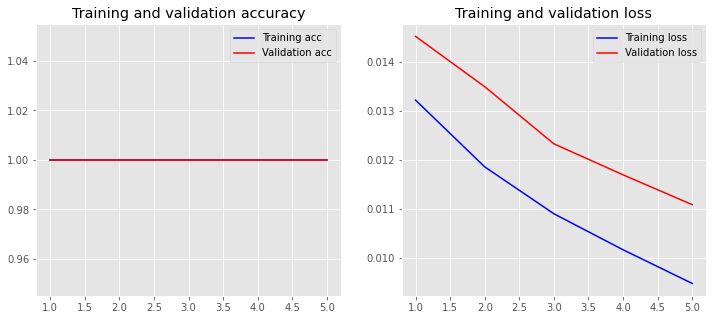

In [31]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model.fit({'url_in': em_jru_train_padurl, 'head_in': em_jru_train_padhead, 'body_in':em_jru_train_padtext},{'op': jru_train_y},
          epochs=5, batch_size=32,validation_data=({'url_in': em_jru_test_padurl, 'head_in': em_jru_test_padhead, 'body_in':em_jru_test_padtext},{'op': jru_test_y}))
plot_history(h)